In [2]:
import torch
import matplotlib.pyplot as plt
import torch.nn.functional as F

import sys

sys.path.append("../stochman/")

from stochman import nnj

# Define convolution parameters

In [3]:
'''
def compute_output_edge(input_edge, kernel_size=1,padding=0,stride=1,dilation=1):
    output_edge = ( input_edge - dilation*(kernel_size-1) + 2*padding -1 )/stride +1 #output edge can be not-integer if stride!=1
    return int(output_edge)
def compute_output_padding(input_edge, output_edge, kernel_size=1,padding=0,stride=1,dilation=1):
    return input_edge - ((output_edge-1)*stride - 2*padding + dilation*(kernel_size-1) + 1)
def compute_reversed_padding(padding, kernel_size=1):
    return kernel_size - 1 - padding
##############################################################################
##############################################################################
##############################################################################
# Set parameters (free to change)

batch_size = 2
IN_c, OUT_c = 2, 2 #number of channels (for input and output)
IN_h, IN_w = 5, 5 #number of pixels per input edges
kernel_size = 3
padding = 1
stride = 1 #don't change me please, bad things will happen
dilation = 1

##############################################################################
# Compute output sizes
OUT_h, OUT_w = compute_output_edge(IN_h, kernel_size=kernel_size,padding=padding,stride=stride,dilation=dilation), compute_output_edge(IN_w, kernel_size=kernel_size,padding=padding,stride=stride,dilation=dilation)
# Compute output padding for conv transpose
assert compute_output_padding(IN_h, OUT_h, kernel_size=kernel_size,padding=padding,stride=stride,dilation=dilation) == compute_output_padding(IN_w, OUT_w, kernel_size=kernel_size,padding=padding,stride=stride,dilation=dilation)
output_padding = compute_output_padding(IN_h, OUT_h, kernel_size=kernel_size,padding=padding,stride=stride,dilation=dilation)
dw_padding = compute_reversed_padding(padding, kernel_size=kernel_size)
dw_reversed_padding = compute_reversed_padding(padding, kernel_size=IN_w)

##############################################################################
# Define convolutional layer
conv = nnj.Conv2d(IN_c, OUT_c, kernel_size=kernel_size,padding=padding,stride=stride,dilation=dilation, bias=None)
assert list(conv.weight.shape) == [OUT_c, IN_c, kernel_size, kernel_size]
# Define input images. Compute output images
inputs = torch.randint(0, 10, (batch_size, IN_c, IN_h, IN_w)).type(torch.float)
outputs = conv(inputs)
assert list(outputs.shape) == [batch_size, OUT_c, OUT_h, OUT_w]
print('conv: \t\t\t weights',conv.weight.shape, '\t- input',inputs.shape, '\t- output',outputs.shape)

# Define reversed convolutional layer (same operator as conv but with switched input/weights)
conv_dw = nnj.ConvTranspose2d(IN_c, batch_size, kernel_size=(IN_h,IN_w),padding=dw_padding,stride=stride,dilation=dilation, output_padding=0, bias=None) #kernel_size value initialization doesn't matter
reversed_inputs = torch.flip(inputs, [-2,-1]).movedim(0,1)
assert conv_dw.weight.shape == reversed_inputs.shape
conv_dw.weight = torch.nn.Parameter(reversed_inputs)
dw_outputs = torch.flip(conv_dw(conv.weight), [-2,-1]).movedim(0,1)
assert torch.max(dw_outputs - outputs) < 1e-5 #chek that the two operators are actually the same
print('conv_dw: \t\t weights',conv_dw.weight.shape, '\t- input',conv.weight.shape, '\t- output',dw_outputs.shape)



# Define transposed of convolutional layer
conv_transposed = nnj.ConvTranspose2d(OUT_c, IN_c, kernel_size=kernel_size,padding=padding,stride=stride,dilation=dilation, output_padding=output_padding, bias=None)
conv_transposed.weight = conv.weight
assert conv_transposed(outputs).shape == inputs.shape
print('conv_transposed: \t weights',conv_transposed.weight.shape, '\t- input',outputs.shape, '\t- output',conv_transposed(outputs).shape)

# Define transposed reversed convolutional layer 
conv_transposed_dw = nnj.Conv2d(OUT_c, batch_size, kernel_size=(OUT_h,OUT_w),padding=dw_reversed_padding,stride=stride,dilation=dilation, bias=None) #kernel_size value initialization doesn't matter
reversed_outputs = torch.flip(outputs, [-2,-1])
assert conv_transposed_dw.weight.shape == reversed_outputs.shape
conv_transposed_dw.weight = torch.nn.Parameter(reversed_outputs)
print('conv_transposed_dw: \t weights',conv_transposed_dw.weight.shape, '\t- input',conv_transposed.weight.movedim(0,1).shape, '\t- output', conv_transposed_dw(conv_transposed.weight.movedim(0,1)).movedim(0,1).shape)
assert torch.max(conv_transposed_dw(conv_transposed.weight.movedim(0,1)).movedim(0,1) - conv_transposed(outputs)) < 1e-5
'''

"\ndef compute_output_edge(input_edge, kernel_size=1,padding=0,stride=1,dilation=1):\n    output_edge = ( input_edge - dilation*(kernel_size-1) + 2*padding -1 )/stride +1 #output edge can be not-integer if stride!=1\n    return int(output_edge)\ndef compute_output_padding(input_edge, output_edge, kernel_size=1,padding=0,stride=1,dilation=1):\n    return input_edge - ((output_edge-1)*stride - 2*padding + dilation*(kernel_size-1) + 1)\ndef compute_reversed_padding(padding, kernel_size=1):\n    return kernel_size - 1 - padding\n##############################################################################\n##############################################################################\n##############################################################################\n# Set parameters (free to change)\n\nbatch_size = 2\nIN_c, OUT_c = 2, 2 #number of channels (for input and output)\nIN_h, IN_w = 5, 5 #number of pixels per input edges\nkernel_size = 3\npadding = 1\nstride = 1 #don't change me pl

In [4]:
def compute_output_edge(input_edge, kernel_size=1,padding=0,stride=1,dilation=1):
    output_edge = ( input_edge - dilation*(kernel_size-1) + 2*padding -1 )/stride +1 #output edge can be not-integer if stride!=1
    return int(output_edge)
def compute_output_padding(input_edge, output_edge, kernel_size=1,padding=0,stride=1,dilation=1):
    return input_edge - ((output_edge-1)*stride - 2*padding + dilation*(kernel_size-1) + 1)
def compute_reversed_padding(padding, kernel_size=1):
    return kernel_size - 1 - padding
##############################################################################
##############################################################################
##############################################################################
# Set parameters (free to change)

batch_size = 2
IN_c, OUT_c = 2, 2 #number of channels (for input and output)
IN_h, IN_w = 11, 20 #number of pixels per input edges
kernel_h, kernel_w = 3, 5
set_padding_for_shape_preserving = True
if set_padding_for_shape_preserving:
    assert kernel_h%2==1 and kernel_w%2==1
    padding_h, padding_w = int((kernel_h-1)/2), int((kernel_w-1)/2)
else:
    padding_h, padding_w = 1, 2
stride = 1 #don't change me please, bad things will happen
dilation = 1

##############################################################################
# Compute output sizes
OUT_h, OUT_w = compute_output_edge(IN_h, kernel_size=kernel_h, padding=padding_h, stride=stride, dilation=dilation), compute_output_edge(IN_w, kernel_size=kernel_w, padding=padding_w, stride=stride, dilation=dilation)
# Compute output padding for conv transpose
out_padding_h, out_padding_w = compute_output_padding(IN_h, OUT_h, kernel_size=kernel_h, padding=padding_h, stride=stride, dilation=dilation), compute_output_padding(IN_w, OUT_w, kernel_size=kernel_w, padding=padding_w, stride=stride, dilation=dilation)
dw_padding_h, dw_padding_w = compute_reversed_padding(padding_h, kernel_size=kernel_h), compute_reversed_padding(padding_w, kernel_size=kernel_w)
dw_reversed_padding_h, dw_reversed_padding_w = compute_reversed_padding(padding_h, kernel_size=IN_h), compute_reversed_padding(padding_w, kernel_size=IN_w)

##############################################################################
# Define convolutional layer
conv = nnj.Conv2d(IN_c, 
                  OUT_c, 
                  kernel_size=(kernel_h, kernel_w), 
                  padding=(padding_h,padding_w), 
                  stride=stride, dilation=dilation, bias=None)
assert list(conv.weight.shape) == [OUT_c, IN_c, kernel_h, kernel_w]
# Define input images. Compute output images
inputs = torch.randint(0, 10, (batch_size, IN_c, IN_h, IN_w)).type(torch.float)
outputs = conv(inputs)
assert list(outputs.shape) == [batch_size, OUT_c, OUT_h, OUT_w]
print('conv: \t\t\t weights',conv.weight.shape, '\t- input',inputs.shape, '\t- output',outputs.shape)

# Define reversed convolutional layer (same operator as conv but with switched input/weights)
conv_dw = nnj.ConvTranspose2d(IN_c, 
                              batch_size, 
                              kernel_size=(IN_h,IN_w), 
                              padding=(dw_padding_h,dw_padding_w), 
                              stride=stride, dilation=dilation, output_padding=0, bias=None)
reversed_inputs = torch.flip(inputs, [-2,-1]).movedim(0,1)
assert conv_dw.weight.shape == reversed_inputs.shape
conv_dw.weight = torch.nn.Parameter(reversed_inputs)
dw_outputs = torch.flip(conv_dw(conv.weight), [-2,-1]).movedim(0,1)
assert torch.max(dw_outputs - outputs) < 1e-5 #chek that the two operators are actually the same
print('conv_dw: \t\t weights',conv_dw.weight.shape, '\t- input',conv.weight.shape, '\t- output',dw_outputs.shape)



# Define transposed of convolutional layer
conv_transposed = nnj.ConvTranspose2d(OUT_c, 
                                      IN_c, 
                                      kernel_size=(kernel_h,kernel_w), 
                                      padding=(padding_h,padding_w), 
                                      stride=stride, dilation=dilation, bias=None, 
                                      output_padding=(out_padding_h,out_padding_w))
conv_transposed.weight = conv.weight
assert conv_transposed(outputs).shape == inputs.shape
print('conv_transposed: \t weights',conv_transposed.weight.shape, '\t- input',outputs.shape, '\t- output',conv_transposed(outputs).shape)

# Define transposed reversed convolutional layer
if out_padding_h!=0 or out_padding_w!=0:
    ### WARNING: output_padding not supported by conv2d. If it is different from 0 then it won't work! 
    ### Only working case: Must set padding=half (that is shape preserving convolution)
    ###                             that is padding = (kernel-1)/2
    print(out_padding_h, out_padding_w)
conv_transposed_dw = nnj.Conv2d(OUT_c, 
                                batch_size, 
                                kernel_size=(OUT_h,OUT_w),
                                padding=(dw_reversed_padding_h,dw_reversed_padding_w),
                                stride=stride, dilation=dilation, bias=None)
reversed_outputs = torch.flip(outputs, [-2,-1])
assert conv_transposed_dw.weight.shape == reversed_outputs.shape
conv_transposed_dw.weight = torch.nn.Parameter(reversed_outputs)
print('conv_transposed_dw: \t weights',conv_transposed_dw.weight.shape, '\t- input',conv_transposed.weight.movedim(0,1).shape, '\t- output', conv_transposed_dw(conv_transposed.weight.movedim(0,1)).movedim(0,1).shape)
assert torch.max(conv_transposed_dw(conv_transposed.weight.movedim(0,1)).movedim(0,1) - conv_transposed(outputs)) < 1e-5 #chek that the two operators are actually the same

conv: 			 weights torch.Size([2, 2, 3, 5]) 	- input torch.Size([2, 2, 11, 20]) 	- output torch.Size([2, 2, 11, 20])
conv_dw: 		 weights torch.Size([2, 2, 11, 20]) 	- input torch.Size([2, 2, 3, 5]) 	- output torch.Size([2, 2, 11, 20])
conv_transposed: 	 weights torch.Size([2, 2, 3, 5]) 	- input torch.Size([2, 2, 11, 20]) 	- output torch.Size([2, 2, 11, 20])
conv_transposed_dw: 	 weights torch.Size([2, 2, 11, 20]) 	- input torch.Size([2, 2, 3, 5]) 	- output torch.Size([2, 2, 11, 20])


# Jacobian of conv (wrt. input)

In [9]:
IN_size, OUT_size = IN_c*IN_h*IN_w, OUT_c*OUT_h*OUT_w

# define base elements
output_identity = torch.eye(OUT_size).unsqueeze(0).expand(batch_size,-1,-1)
print(output_identity.shape)
output_identity = output_identity.reshape(batch_size, OUT_size, OUT_c, OUT_h, OUT_w)
print(output_identity.shape)

jacobian = conv._jacobian_mult(torch.zeros(batch_size,IN_c,IN_h,IN_w), torch.zeros(batch_size,OUT_c,OUT_h,OUT_w), output_identity)


torch.Size([2, 440, 440])
torch.Size([2, 440, 2, 11, 20])


RuntimeError: shape '[2, 20, 2, 11, 20]' is invalid for input of size 387200

# Jacobian of conv (wrt. input) transposed

Text(0.5, 1.0, 'J conv (wrt. input) ^T')

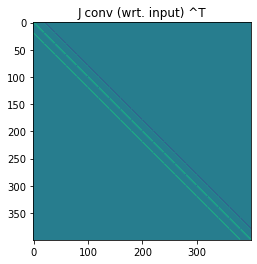

In [ ]:
full_jacobian_T = torch.zeros(N*N,M*M)
for i in range(M):
    for j in range(M):
        jac_in = torch.zeros(1,1,M,M).type(torch.float)
        jac_in[0,0,i,j] = 1

        #same as before, but with "conv_transpose" and changing output/input
        jacobian = conv_transpose._jacobian_mult(output, input, jac_in)

        col = M*i+j
        for k in range(N):
            for q in range(N):
                row = N*k+q
                full_jacobian_T[row,col] = jacobian[0,0,k,q]

        if print_each_column_computation:
            plt.figure(figsize=(6,3))
            plt.subplot(1,4,1)
            plt.imshow(jac_in[0,0].detach().numpy())
            plt.subplot(1,4,2)
            plt.imshow(jacobian[0,0].detach().numpy())
            plt.show()

plt.imshow(full_jacobian_T.detach().numpy())
plt.title('J conv (wrt. input) ^T')

# Jacobian of conv (wrt. weights)

Text(0.5, 1.0, 'J conv (wrt. weights)')

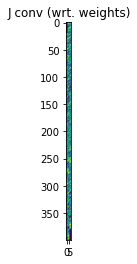

In [ ]:
# N*N = number of inputs
# M*M = number of ouputs
# W*W = number of weights

full_jacobian_dw = torch.zeros(M*M,W*W)

for i in range(W):
    for j in range(W):
        jac_in = torch.zeros(1,1,W,W).type(torch.float)
        jac_in[0,0,i,j] = 1

        jacobian = conv_dw._jacobian_mult(dw_input, dw_output, jac_in)
        #reversed_jac = torch.zeros_like(jacobian)
        #for k in range(W):
        #    for q in range(W):
        #        reversed_jac[0,0,k,q] = jacobian[0,0,W-k-1,W-q-1]
        #jacobian = reversed_jac

        #col = W*W - (W*i+j) - 1 #WRONG! DON'T DO I, must flip on rows, not columns
        col = W*i+j
        for k in range(M):
            for q in range(M):
                row = -(M*k+q) - 1 #flip on rows
                full_jacobian_dw[row, col] = jacobian[0,0,k,q]

        if print_each_column_computation:
            plt.figure(figsize=(6,3))
            plt.subplot(1,4,1)
            plt.imshow(jac_in[0,0].detach().numpy())
            plt.subplot(1,4,2)
            plt.imshow(jacobian[0,0].detach().numpy())
            plt.show()

plt.imshow(full_jacobian_dw.detach().numpy())
plt.title('J conv (wrt. weights)')

# Jacobian of conv (wrt. weights) transposed

Text(0.5, 1.0, 'J conv (wrt. weights) ^T')

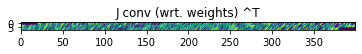

In [ ]:
full_jacobian_dw_T = torch.zeros(W*W,M*M)
for i in range(M):
    for j in range(M):
        jac_in = torch.zeros(1,1,M,M).type(torch.float)
        jac_in[0,0,i,j] = 1

        jacobian = conv_dw_transposed._jacobian_mult(dw_output, dw_input, jac_in)

        col = (M*M) - (M*i+j) - 1
        for k in range(W):
            for q in range(W):
                row = W*k+q
                full_jacobian_dw_T[row,col] = jacobian[0,0,k,q]

        if print_each_column_computation:
            plt.figure(figsize=(6,3))
            plt.subplot(1,4,1)
            plt.imshow(jac_in[0,0].detach().numpy())
            plt.subplot(1,4,2)
            plt.imshow(jacobian[0,0].detach().numpy())
            plt.show()

plt.imshow(full_jacobian_dw_T.detach().numpy())
plt.title('J conv (wrt. weights) ^T')

# Assess jacobian wrt weights comparing to row-by-row computation (single layer NN, for now)

Pointwise max difference beetwen two methods = tensor(0., grad_fn=<MaxBackward1>)


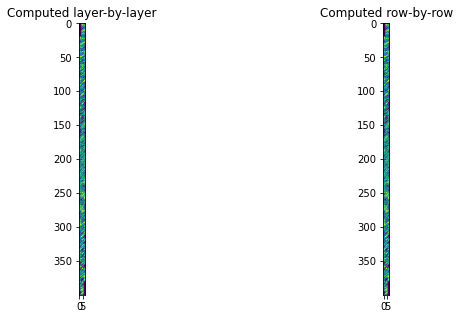

In [ ]:
from asdfghjkl.gradient import batch_gradient

def _flatten_after_batch(tensor: torch.Tensor):
    if tensor.ndim == 1:
        return tensor.unsqueeze(-1)
    else:
        return tensor.flatten(start_dim=1)
        
def _get_batch_grad(model):
    batch_grads = list()
    for module in model.modules():
        if hasattr(module, 'op_results'):
            res = module.op_results['batch_grads']
            if 'weight' in res:
                batch_grads.append(_flatten_after_batch(res['weight']))
            if 'bias' in res:
                batch_grads.append(_flatten_after_batch(res['bias']))
            if len(set(res.keys()) - {'weight', 'bias'}) > 0:
                raise ValueError(f'Invalid parameter keys {res.keys()}')
    return torch.cat(batch_grads, dim=1)

'''def batch_gradient(model, loss_fn, inputs, targets):
    with extend(model, OP_BATCH_GRADS):
        model.zero_grad()
        f = model(inputs)
        loss = loss_fn(f, targets)
        loss.backward()
    return f'''
    
def jacobians(x, model, output_size=784):
    """Compute Jacobians \\(\\nabla_\\theta f(x;\\theta)\\) at current parameter \\(\\theta\\)
    using asdfghjkl's gradient per output dimension.
    Parameters
    ----------
    x : torch.Tensor
        input data `(batch, input_shape)` on compatible device with model.
    Returns
    -------
    Js : torch.Tensor
        Jacobians `(batch, parameters, outputs)`
    f : torch.Tensor
        output function `(batch, outputs)`
    """
    Js = list()
    for i in range(output_size):
        for j in range(output_size):
            def loss_fn(outputs, targets):
                return outputs[:, 0, i, j].sum()

            f = batch_gradient(model, loss_fn, x, None).detach()
            Jk = _get_batch_grad(model)

            Js.append(Jk)
    Js = torch.stack(Js, dim=1)

    return Js, f

#conv = nnj.Conv2d(1,1,kernel_size=kernel_size,padding=padding,stride=stride,dilation=dilation, bias=None)
Js, _ = jacobians(input, conv, output_size=M)


plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.title('Computed layer-by-layer')
plt.imshow(full_jacobian_dw.detach().numpy())
plt.subplot(1,2,2)
plt.title('Computed row-by-row')
plt.imshow(Js[0].detach().numpy())


print('Pointwise max difference beetwen two methods =',torch.max(full_jacobian_dw - Js[0]))

# J^T J

Text(0.5, 0.98, 'Jacobian wrt weights')

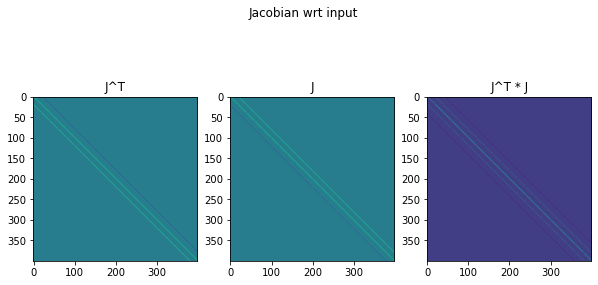

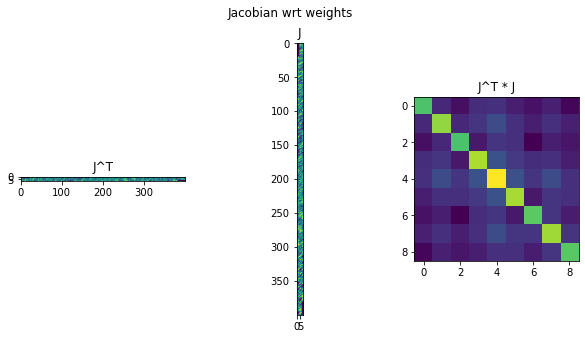

In [ ]:
#JtJ2 = torch.einsum('ij,jk,kq->iq', full_jacobian, JtJ2, full_jacobian_T)
JtJ = torch.einsum('ij,jk->ik', full_jacobian_T, full_jacobian)

plt.figure(figsize=(10,5))
plt.subplot(1,3,1)
plt.title('J^T')
plt.imshow(full_jacobian_T.detach().numpy())
plt.subplot(1,3,2)
plt.title('J')
plt.imshow(full_jacobian.detach().numpy())
plt.subplot(1,3,3)
plt.title('J^T * J')
plt.imshow(JtJ.detach().numpy())
plt.suptitle('Jacobian wrt input')
#plt.figure()
#plt.imshow(JtJ2.detach().numpy())



JtJ_dw = torch.einsum('ij,jk->ik', full_jacobian_dw_T, full_jacobian_dw)

plt.figure(figsize=(10,5))
plt.subplot(1,3,1)
plt.title('J^T')
plt.imshow(full_jacobian_dw_T.detach().numpy())
plt.subplot(1,3,2)
plt.title('J')
plt.imshow(full_jacobian_dw.detach().numpy())
plt.subplot(1,3,3)
plt.title('J^T * J')
plt.imshow(JtJ_dw.detach().numpy())
plt.suptitle('Jacobian wrt weights')

# J^T * tmp * J  --> FULL matrix (tmp) case

Pointwise max difference beetwen two methods = tensor(9.5367e-07, grad_fn=<MaxBackward1>)


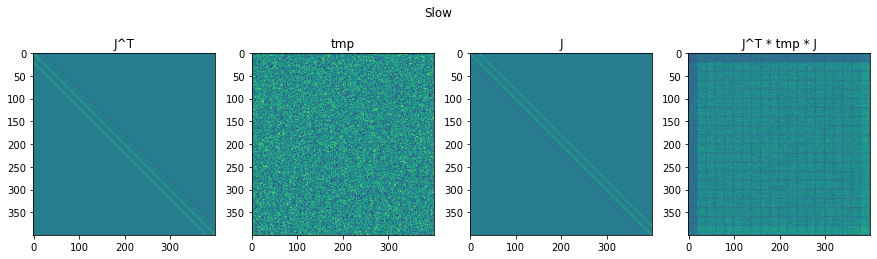

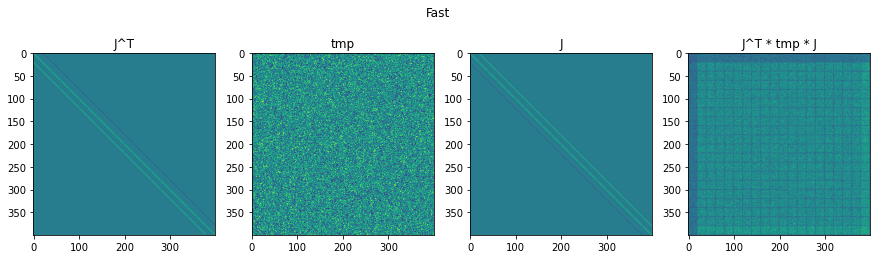

In [ ]:
tmp = torch.randint(0, 10, (M*M, M*M)).type(torch.float)




# SLOW IMPLEMENTATION (requires jacobian matrixes)
slow_Jt_tmp_J = torch.einsum('ij,jk,kq->iq', full_jacobian_T, tmp, full_jacobian)
#plt.imshow(slow_Jt_tmp_J.detach().numpy())





# FAST IMPLEMENTATION 
# two identical implementation (one with for loops, one with reshape and movedim)
use_for_loops = False
if use_for_loops:
    # for loops implementation, I leave the code here because it's more clear to understand
    tmp_rows = torch.zeros(M*M, 1, M, M).type(torch.float)
    for row_h in range(M):
        for row_w in range(M):
            for col_h in range(M):
                for col_w in range(M):
                    tmp_rows[row_h*M+row_w, 0, col_h, col_w] = tmp[row_h*M+row_w, col_h*M+col_w]

    tmpt_cols = tmp_rows

    Jt_tmptt_cols = conv_transpose._jacobian_mult(torch.zeros(M*M, 1, M, M), torch.zeros(M*M, 1, N, N), tmpt_cols)

    #print(Jt_tmptt_cols.shape) # must be =(M*M, 1, N, N)
    Jt_tmptt_rows = torch.zeros(N*N, 1, M, M).type(torch.float)
    for row_h in range(N):
        for row_w in range(N):
            for col_h in range(M):
                for col_w in range(M):
                    Jt_tmptt_rows[row_h*N+row_w, 0, col_h, col_w] = Jt_tmptt_cols[col_h*M+col_w, 0, row_h, row_w]

    tmp_J_cols = Jt_tmptt_rows
    #print(tmp_J_cols.shape) # must be =(N*N, 1, M, M)

    Jt_tmp_J_cols = conv_transpose._jacobian_mult(torch.zeros(N*N, 1, M, M), torch.zeros(N*N, 1, N, N), tmp_J_cols)

    Jt_tmp_J = torch.zeros(N*N, N*N).type(torch.float)
    for row_h in range(N):
        for row_w in range(N):
            for col_h in range(N):
                for col_w in range(N):
                    Jt_tmp_J[row_h*N+row_w, col_h*N+col_w] = Jt_tmp_J_cols[col_h*N+col_w, 0, row_h, row_w]
else:
    #actual implementation
    tmp_rows = tmp.reshape(M*M,1,M,M)
    tmpt_cols = tmp_rows
    Jt_tmptt_cols = conv_transpose._jacobian_mult(torch.zeros(M*M, 1, M, M), torch.zeros(M*M, 1, N, N), tmpt_cols)
    Jt_tmptt_rows = Jt_tmptt_cols.reshape(N*N,M*M).movedim(0,1).reshape(M*M,1,N,N)
    tmp_J_cols = Jt_tmptt_rows
    Jt_tmp_J_cols = conv_transpose._jacobian_mult(torch.zeros(N*N, 1, M, M), torch.zeros(N*N, 1, N, N), tmp_J_cols)
    Jt_tmp_J = Jt_tmp_J_cols.reshape(N*N,N*N).movedim(0,1)



#plt.figure(figsize=(10,5))
#plt.subplot(1,2,1)
#plt.title('Slow')
#plt.imshow(slow_Jt_tmp_J.detach().numpy())
#plt.subplot(1,2,2)
#plt.title('Fast')
#plt.imshow(Jt_tmp_J.detach().numpy())
#plt.suptitle('J^t * tmp * J')

plt.figure(figsize=(15,4))
plt.subplot(1,4,1)
plt.title('J^T')
plt.imshow(full_jacobian_T.detach().numpy())
plt.subplot(1,4,2)
plt.title('tmp')
plt.imshow(tmp.detach().numpy())
plt.subplot(1,4,3)
plt.title('J')
plt.imshow(full_jacobian.detach().numpy())
plt.subplot(1,4,4)
plt.title('J^T * tmp * J')
plt.imshow(slow_Jt_tmp_J.detach().numpy())
plt.suptitle('Slow')

plt.figure(figsize=(15,4))
plt.subplot(1,4,1)
plt.title('J^T')
plt.imshow(full_jacobian_T.detach().numpy())
plt.subplot(1,4,2)
plt.title('tmp')
plt.imshow(tmp.detach().numpy())
plt.subplot(1,4,3)
plt.title('J')
plt.imshow(full_jacobian.detach().numpy())
plt.subplot(1,4,4)
plt.title('J^T * tmp * J')
plt.imshow(Jt_tmp_J.detach().numpy())
plt.suptitle('Fast')

print('Pointwise max difference beetwen two methods =',torch.max(slow_Jt_tmp_J - Jt_tmp_J))




# J^T * tmp * J  --> DIAGONAL matrix (tmp) case

tmp shape = torch.Size([400, 400])
jac shape = torch.Size([400, 400])
Pointwise max difference beetwen two methods = tensor(2.3842e-07, grad_fn=<MaxBackward1>)


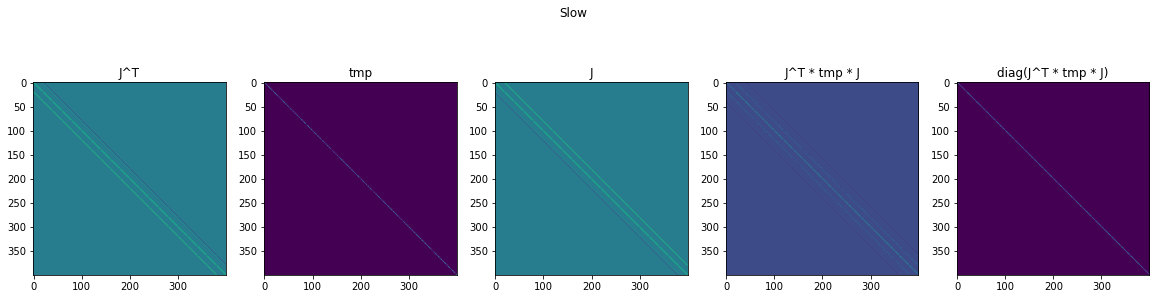

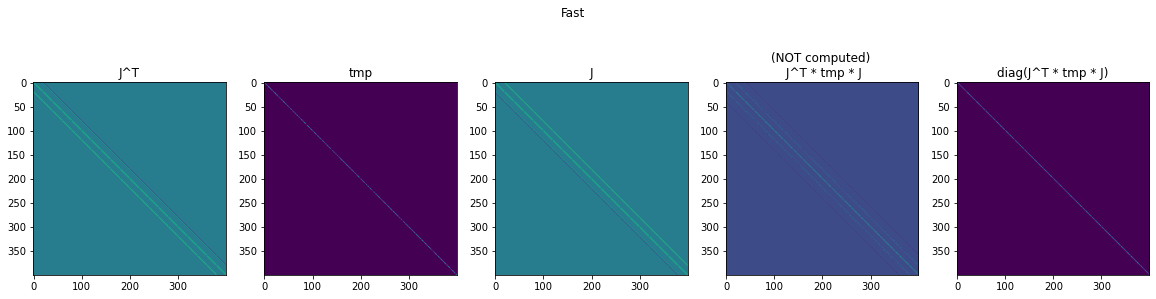

In [ ]:
diag_tmp = torch.randint(1, 10, (M*M,)).type(torch.float)
tmp = torch.diag(diag_tmp)
print('tmp shape =',tmp.shape)
print('jac shape =',full_jacobian.shape)




# SLOW IMPLEMENTATION (requires jacobian matrixes AND full tmp stored)
slow_Jt_tmp_J = torch.einsum('ij,jk,kq->iq', full_jacobian_T, tmp, full_jacobian)
slow_diag_Jt_tmp_J = torch.zeros_like(slow_Jt_tmp_J)
for i in range(N*N):
    slow_diag_Jt_tmp_J[i,i] = slow_Jt_tmp_J[i,i]


#FAST IMPLEMENTATION (never access to tmp, only to diag_tmp)
conv_sq = nnj.ConvTranspose2d(1,1,kernel_size=kernel_size,padding=padding,stride=stride,dilation=dilation, output_padding=output_padding, bias=None)
conv_sq.weight = torch.nn.Parameter(conv.weight**2)

input_tmp = diag_tmp.reshape(1,1,M,M)
output_tmp = conv_sq._jacobian_mult(torch.zeros(1, 1, M, M), torch.zeros(1, 1, N, N), input_tmp)
diag_Jt_tmp_J = output_tmp.reshape(N*N)



plt.figure(figsize=(20,5))
plt.subplot(1,5,1)
plt.title('J^T')
plt.imshow(full_jacobian_T.detach().numpy())
plt.subplot(1,5,2)
plt.title('tmp')
plt.imshow(tmp.detach().numpy())
plt.subplot(1,5,3)
plt.title('J')
plt.imshow(full_jacobian.detach().numpy())
plt.subplot(1,5,4)
plt.title('J^T * tmp * J')
plt.imshow(slow_Jt_tmp_J.detach().numpy())
plt.subplot(1,5,5)
plt.title('diag(J^T * tmp * J)')
plt.imshow(slow_diag_Jt_tmp_J.detach().numpy())
plt.suptitle('Slow')


plt.figure(figsize=(20,5))
plt.subplot(1,5,1)
plt.title('J^T')
plt.imshow(full_jacobian_T.detach().numpy())
plt.subplot(1,5,2)
plt.title('tmp')
plt.imshow(tmp.detach().numpy())
plt.subplot(1,5,3)
plt.title('J')
plt.imshow(full_jacobian.detach().numpy())
plt.subplot(1,5,4)
plt.title('(NOT computed) \n J^T * tmp * J')
plt.imshow(slow_Jt_tmp_J.detach().numpy())
plt.subplot(1,5,5)
plt.title('diag(J^T * tmp * J)')
plt.imshow(torch.diag(diag_Jt_tmp_J).detach().numpy())
plt.suptitle('Fast')


print('Pointwise max difference beetwen two methods =',torch.max(diag_Jt_tmp_J-torch.diag(slow_diag_Jt_tmp_J)))